<a href="https://colab.research.google.com/github/Sampritisahoo/UNIFIED-MENTOR_DATA-SCIENCE/blob/main/UNIFIED_MENTOR_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 Clinical Trials EDA Pandas

In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df =pd.read_csv('/content/COVID clinical trials.csv', index_col = 0)


In [15]:
df.head(n = 5)

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
Rank,,,,,,,,,,,,,,,,,,,,,
1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [16]:
df.shape

(5783, 26)

In [17]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [22]:
df.select_dtypes(exclude = 'object').columns

Index(['Enrollment'], dtype='object')

In [26]:
missing_data = df.isnull().mean() * 100
missing_data

,0
NCT Number,0.000000
Title,0.000000
Acronym,57.115684
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000
Gender,0.172921


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(data, caption='', ylabel='Percentage of Missing Data'):
    sns.set(rc={'figure.figsize': (15, 8.27)})
    plt.xticks(rotation=90)

    # handle dict vs pandas Series
    if hasattr(data, "keys") and hasattr(data, "values"):
        x_vals = list(data.keys())[:min(40, len(data))]
        y_vals = list(data.values)[:min(40, len(data))]
    else:
        raise ValueError("Data should be a dict or Pandas Series")

    ax = sns.barplot(x=x_vals, y=y_vals)
    ax.set_title(caption)
    ax.set_ylabel(ylabel)

    plt.show()


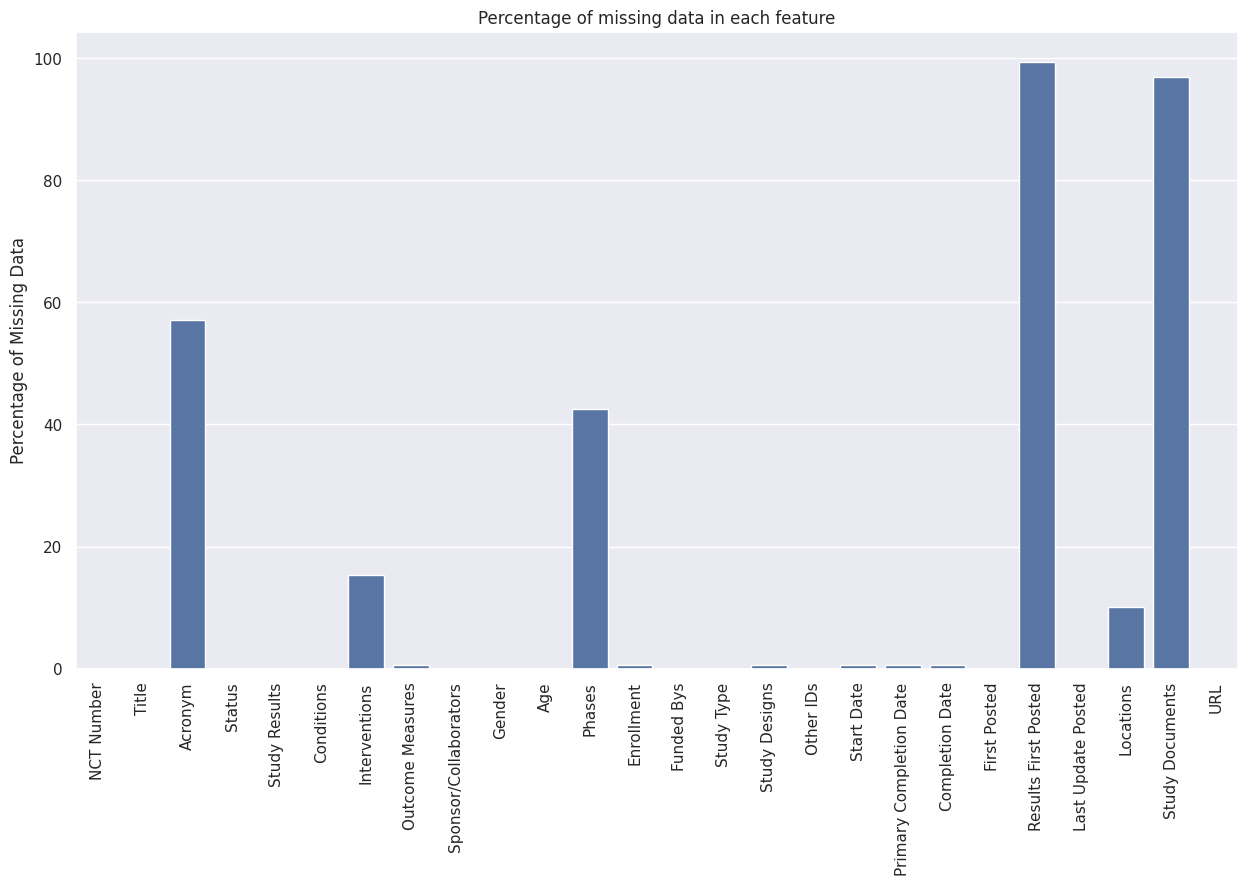

In [36]:
visualize_data(missing_data , 'Percentage of missing data in each feature')

In [37]:
df.drop(['Results First Posted' , 'Study Documents'] , inplace
= True , axis = 1 )

In [38]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [39]:
print(f"Shape before dropping duplicates data {df.shape}")
df.drop_duplicates(inplace = True)
print(f"Shape after dropping duplicates data {df.shape}")

Shape before dropping duplicates data (5783, 24)
Shape after dropping duplicates data (5783, 24)


In [44]:
print(f"Shape before dropping Null rows: {df.shape}")

# keep rows that have at least 10 non-null values
df.dropna(axis=0, thresh=10, inplace=True)

print(f"Shape after dropping Null rows: {df.shape}")


Shape before dropping Null rows: (5783, 24)
Shape after dropping Null rows: (5783, 24)


In [45]:
df.isnull().mean() * 100

,0
NCT Number,0.000000
Title,0.000000
Acronym,57.115684
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000
Gender,0.172921


In [46]:
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in
range(df.shape[0])]
df['Country'] = countries

In [47]:
df.columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [48]:
df.Country.value_counts()[:35]

,count
Country,
United States,1267
France,647
nan,585
United Kingdom,306
Italy,235
Spain,234
Turkey,219
Canada,202
Egypt,192


In [49]:
print(f"Number of unique values is {df.Acronym.nunique()} \n")
df.Acronym.value_counts()

Number of unique values is 2338 



,count
Acronym,
COVID-19,47
PROTECT,7
CORONA,6
RECOVER,5
Covid-19,5
...,...
EPICOVIDEHA,1
COVID STEROID,1
pVAC,1


In [50]:
(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending = False) * 100)[:60]

,Acronym
Country,
Bahrain,100.000000
Azerbaijan,100.000000
Bosnia and Herzegovina,100.000000
Cape Verde,100.000000
Cambodia,100.000000
Bulgaria,100.000000
Belarus,100.000000
Cyprus,100.000000
Guinea-Bissau,100.000000


In [51]:
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [52]:
df.isnull().mean() * 100

,0
NCT Number,0.000000
Title,0.000000
Acronym,0.000000
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000
Gender,0.172921


In [54]:
categorical_features = df.select_dtypes(include =
object).columns

features =categorical_features[df[categorical_features].isnull().mean() >0]

for feature in features:df[feature] = df[feature].fillna(f"Missing {feature}")

In [55]:
df.isnull().mean() * 100

,0
NCT Number,0.00000
Title,0.00000
Acronym,0.00000
Status,0.00000
Study Results,0.00000
Conditions,0.00000
Interventions,0.00000
Outcome Measures,0.00000
Sponsor/Collaborators,0.00000
Gender,0.00000


In [56]:
df.Enrollment.skew()

np.float64(34.06593382031148)

<Axes: ylabel='Density'>

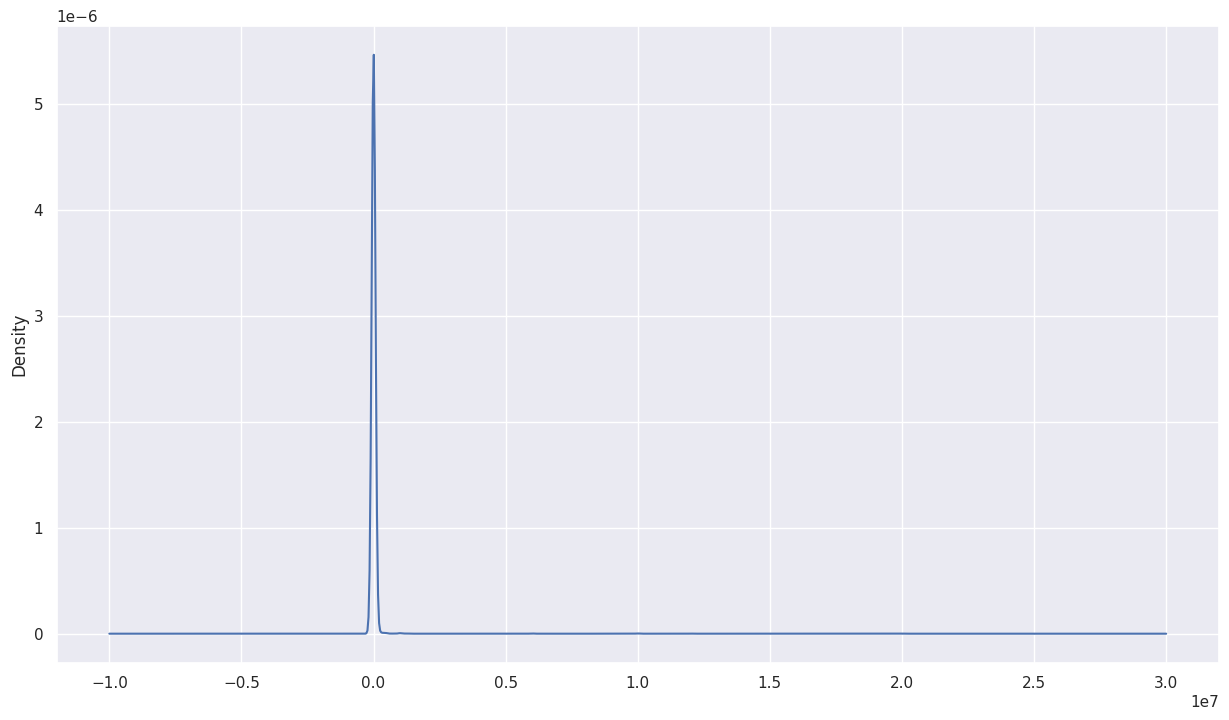

In [57]:
df.Enrollment.plot(kind = 'kde')

In [59]:
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()
print(f"the min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

the min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841073


In [60]:
df.Enrollment = df.Enrollment.fillna(median_Value)

In [61]:
df.isnull().mean() * 100

,0
NCT Number,0.0
Title,0.0
Acronym,0.0
Status,0.0
Study Results,0.0
Conditions,0.0
Interventions,0.0
Outcome Measures,0.0
Sponsor/Collaborators,0.0
Gender,0.0


In [62]:
df.head()

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Country
Rank,,,,,,,,,,,,,,,,,,,,,
1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,France
2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,Colombia
3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,San Marino
4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,Hong Kong
5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,France


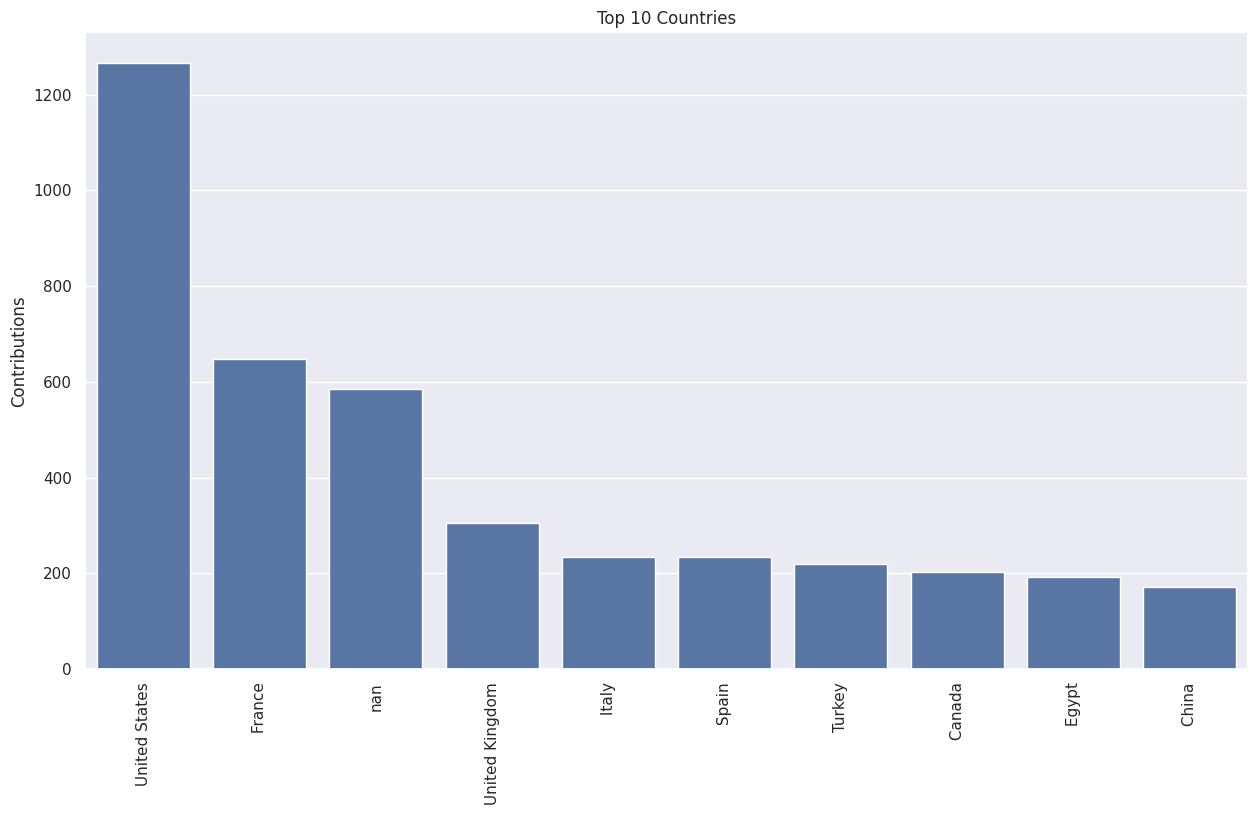

In [63]:
top_10_Countires = df.Country.value_counts()[:10]
visualize_data(top_10_Countires , caption = 'Top 10 Countries', ylabel = 'Contributions')

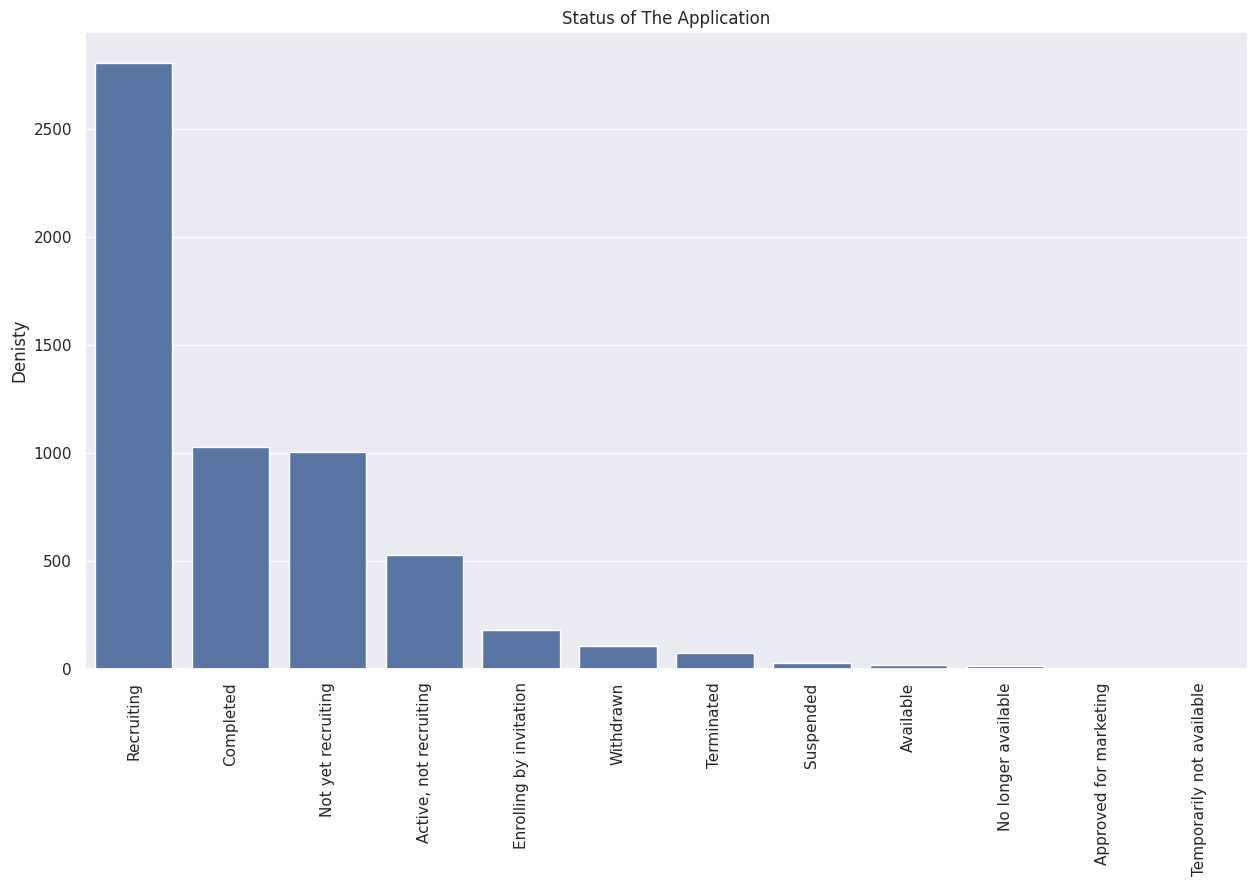

In [64]:
status = df.Status.value_counts()

visualize_data(status , caption = 'Status of The Application' ,
ylabel = 'Denisty')

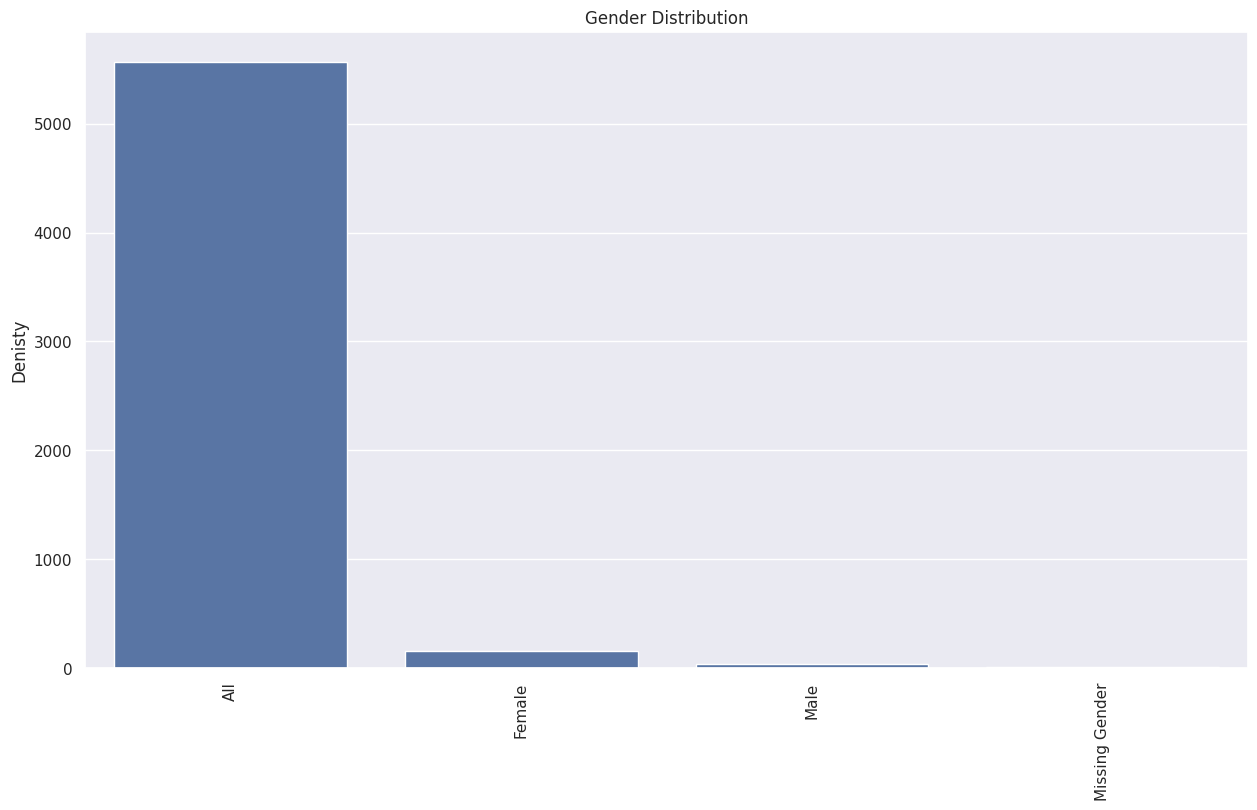

In [65]:
gender = df.Gender.value_counts()
visualize_data(gender , caption = 'Gender Distribution' ,
ylabel = 'Denisty')

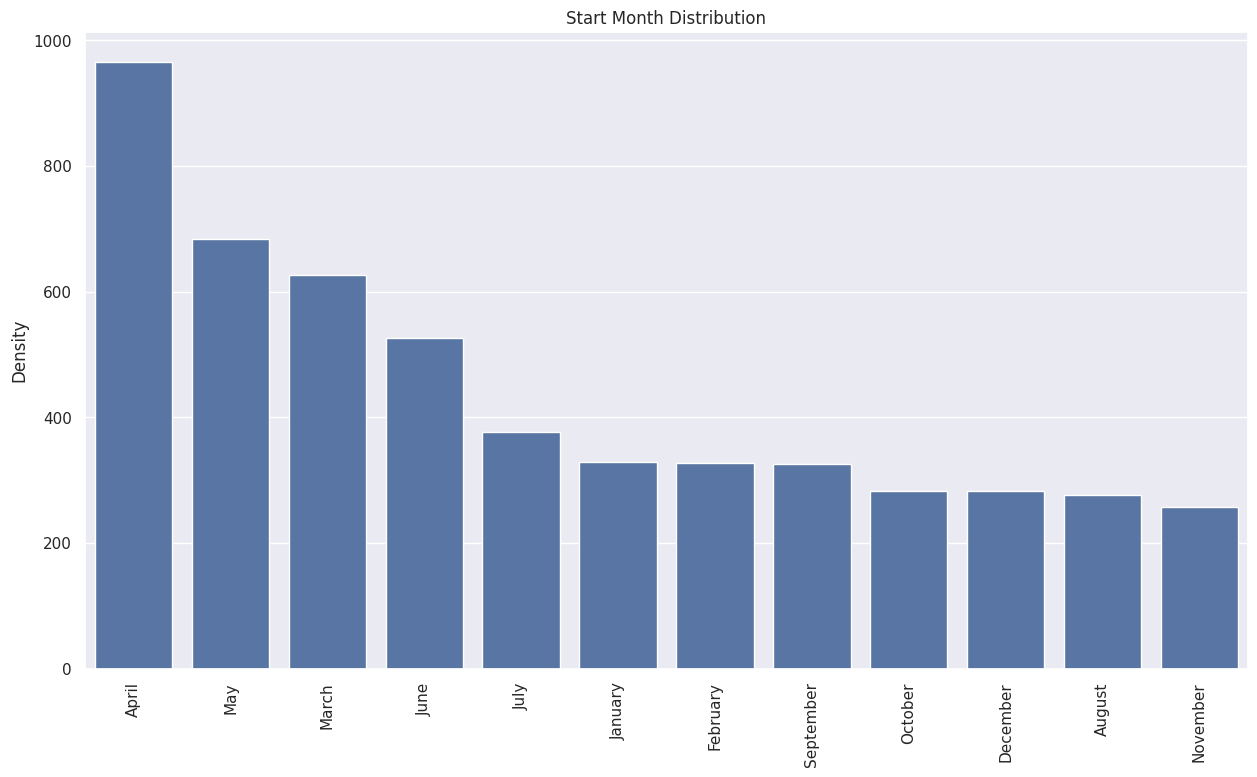

In [69]:
# ensure column is datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# extract month name
start_month = df['Start Date'].dt.month_name()

# get frequency distribution
start_month_Distribution = start_month.value_counts()

# visualize
visualize_data(start_month_Distribution, caption='Start Month Distribution', ylabel='Density')


In [70]:
print(f"The shape of data frame is {df.shape}")
print(f"Nunique in NCT Number is {df['NCT Number'].nunique()}")
print(f"Nunique in URL is {df.URL.nunique()}")

The shape of data frame is (5783, 25)
Nunique in NCT Number is 5783
Nunique in URL is 5783
